# Mercedes-Benz Greener Manufacturing

## 1.1 Introduction (Kaggle)

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

## 1.2 Case Study Overview

1. In automobiles industries there will be a Testing department which tests the safety and reliability of cars that come out of the production. These tests play a crucial part in manufacturing process.
2. Mercedes Benz industry manufactures huge number of cars every day and they will be sent to testing as final stage in production. Every possible feature combination of vehicles must undergo through the test bench to ensure that each vehicle is robust for daily use. More time spent on the test bench will result in more CO2 emissions and increase of costs to company.

## 1.3 Business Use Case

In this we are trying to optimize the time spent on testing for every vehicle that comes to test bench. Using this optimization will result in speedier testing and decrease in CO2 emissions due to testing procedure for Mercedes Benz.

## 1.4 Mapping Real world problem to ML problem

   The Mercedes Greener dataset is comprised of 369 features which are (categorical and numeric)are anonymised. So conventional set of rules don't work we can use ML algorithms that has ability to apply complex calculations to large number of features which helps in optimizing the time spent on test bench without reducing diamler standards. 

<p>This is a Regression Problem.<p>
Regression: This problem can be solved using Classical ML techniques where we are trying to predict Time taken by a vehicle on a test bench which is a continuous target variable based on vehicle features which are independent. This type of problem is Supervised Learning where model can learn from labelled data.

## 1.5 Evaluation Metrics

Mercedes Benz industry suggested to use R2 (Coefficient of Determination) to evaluate the model performance.

Why R2(Coefficent of Determination):
 1. R2 is given byt the formula 1-(SSE/TSS).
 2. SSE = Sum of Squared errors (sum of the squares of the differences between the observed values and the expected values)
 3. TSS = Total sum of squares (Total sum of squares, the sum of the squares of the differences between the observed values and the mean of the observed values.)
 4. The R2 is usually between 0 and 1. It is the simply the fraction of response captured by the model. If R2 values is 1 then our model explains all the variability of the target data around its mean.
 5. R2 value can be more easily interpretable and measures goodness of fit in capturing variance of the data. 
 6. RMSE is measure of deviation of model predictions from actual values. RMSE doesnt have any range. If we look at RMSE only it doenst add how much variablity our model has.
 7. R2 is most common measure used in model fitting procedure for regression and forecasting.

## 1.6 Data Source and Overview 

1. Mercedes Benz industry posed the problem on Kaggle and data is provided in two CSV files (train, test).
 (https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data)
2. The dataset consists of 377 features (x0, x1, x2,…., x386) which are anonymized and each represent a custom feature in Mercedes car like 4WD, suspension or heads up display which together define a car model.
3. The dataset has two types of features. Categorical features, Numerical Binary features. The ID column in data represent the unique configuration vehicle Id.
4. The target variable y represents the time a vehicle takes to pass testing in seconds.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Loading the data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Getting categorical column and numerical column names
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
categ = list(train.select_dtypes(include = 'object').columns)
numeric = list(train.select_dtypes(include = 'int64').columns)
print('Number of categorical columns is', len(categ))
print('Number of numerical binary columns is',len(numeric))

Number of categorical columns is 8
Number of numerical binary columns is 369


#### Description of dataset

In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for Null Values and Duplicate ID's

In [6]:
print('Number of Null values in train is: ',train.isnull().sum(axis = 1).sum())
train.isnull().sum(axis = 1)

Number of Null values in train is:  0


0       0
1       0
2       0
3       0
4       0
       ..
4204    0
4205    0
4206    0
4207    0
4208    0
Length: 4209, dtype: int64

In [7]:
print('Number of duplicate IDs is ',train['ID'].duplicated().sum())

Number of duplicate IDs is  0


## EDA

### Analysis of Target Variable (y)

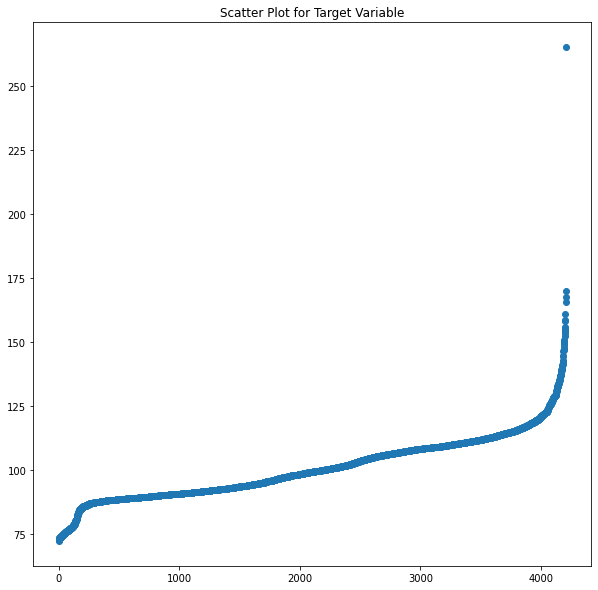

In [8]:
# Scatter plot
y_sort = list(train['y'].values)
y_sort.sort()
plt.figure(figsize = (10,10))
plt.scatter(data = train,x = range(train.shape[0]),y = y_sort)
plt.title('Scatter Plot for Target Variable')
plt.show()

#### Observations:
1. Above is scatter plot made between series(with length of dataset) and sorted values of Y from train dataframe.
2. We can see that most points lies between 80 and 140.
3. There are some points which are far away and these are outliers.

c:\Miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


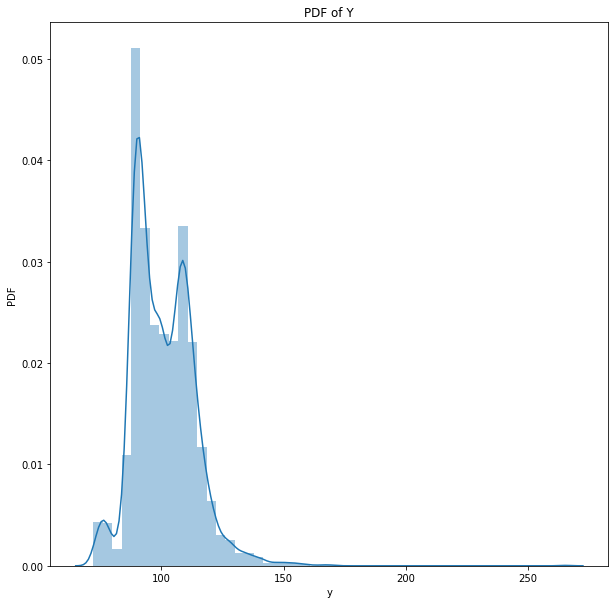

c:\Miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

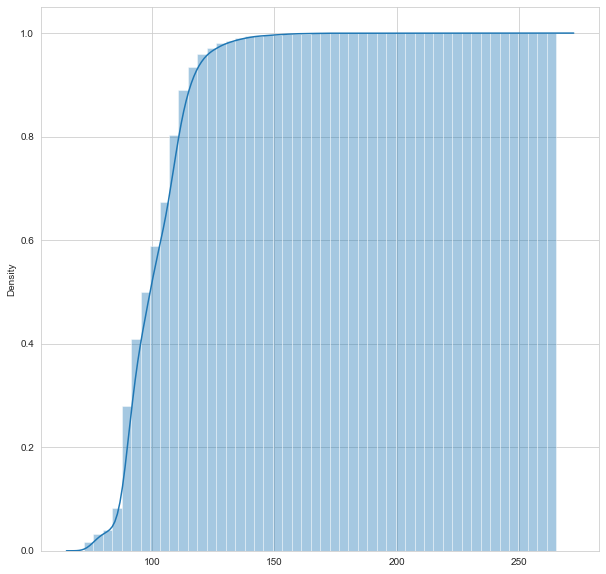

In [9]:
# Plotting PDF and CDF and Boxplot
plt.figure(figsize=(10,10))
sns.distplot(train['y'])
plt.ylabel('PDF')
plt.title('PDF of Y')
plt.show()
#CDF using SNS: https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
kwargs = {'cumulative': True}
sns.set_style("whitegrid")
plt.figure(figsize = (10,10))
sns.distplot(train['y'].values, hist_kws=kwargs, kde_kws=kwargs)

#### Observations
1. From above PDF plot we can see two peaked curves and distribution is similar to Gaussian.
2. We can see that the values are centered around almost 100 and most values lie between 80 and 120.
3. Since the curve is highly skewed to right shows that some values are above 200.
4. From the CDF plot we can see that atleast 95% values lie below 150.

In [10]:
#Taking threshold for Target Variable
thresholds = [140,145,150]
target = list(train['y'].values)
target.sort()
for i in thresholds:
    print(stats.percentileofscore(target,i),'% values lie below '+ str(i))

99.16844856260394 % values lie below 140
99.47731052506533 % values lie below 145
99.64362081254454 % values lie below 150


#### Observations
1. From above taking 150 as threshold there will be 99.6% values lie below 150.
2. So we will take 150 as threshold for the target variable.

### Analysis of ID and Categorical Variables

## ID

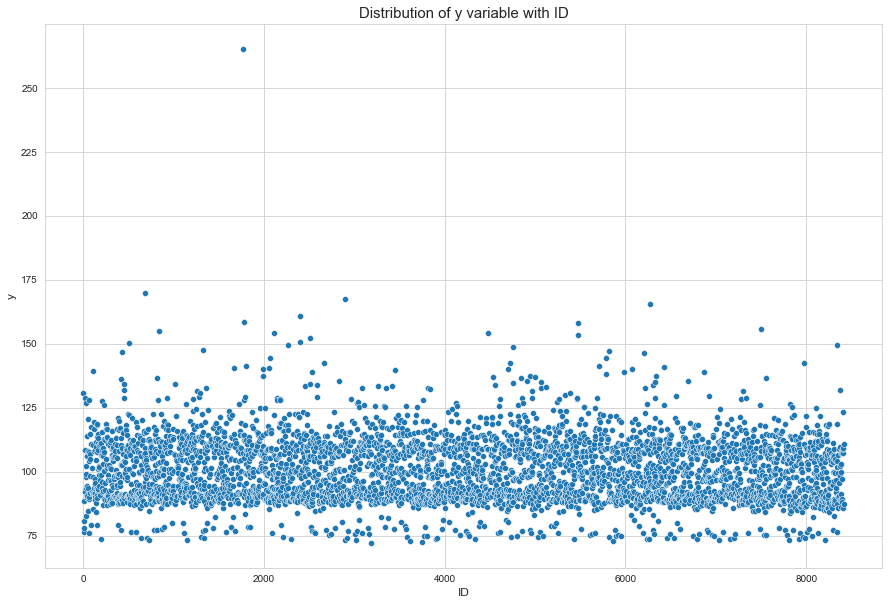

In [11]:
#ID
plt.figure(figsize=(15,10))
sns.scatterplot(x='ID',y='y', data=train)
plt.xlabel("ID", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with ID", fontsize=15)
plt.show()

#### Observations
1. From above plot we can see that there is a slight decrease of Y with respect to ID. It might be that cars later inspected took less time in test bench.
2. Even though in plot it shows that ID has importance in predicting model, but in reality using ID doesnt make sense.
3. We will train our best model with ID and without ID.
4. From the dataset we can see that ID has been randomly sampled into train and test sets.

In [12]:
#Getting unique values for each categorical columns
def values_info(col_name):
    print('Number of unique values for '+col_name+' is',len(train[col_name].unique()))
    print('Unique values for '+col_name+' are',train[col_name].unique())
    print()

In [13]:
for i in categ:
    values_info(i)

Number of unique values for X0 is 47
Unique values for X0 are ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

Number of unique values for X1 is 27
Unique values for X1 are ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

Number of unique values for X2 is 44
Unique values for X2 are ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']

Number of unique values for X3 is 7
Unique values for X3 are ['a' 'e' 'c' 'f' 'd' 'b' 'g']

Number of unique values for X4 is 4
Unique values for X4 are ['d' 'b' 'c' 'a']

Number of unique values for X5 is 29
Unique values for X5 are ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag

## X0

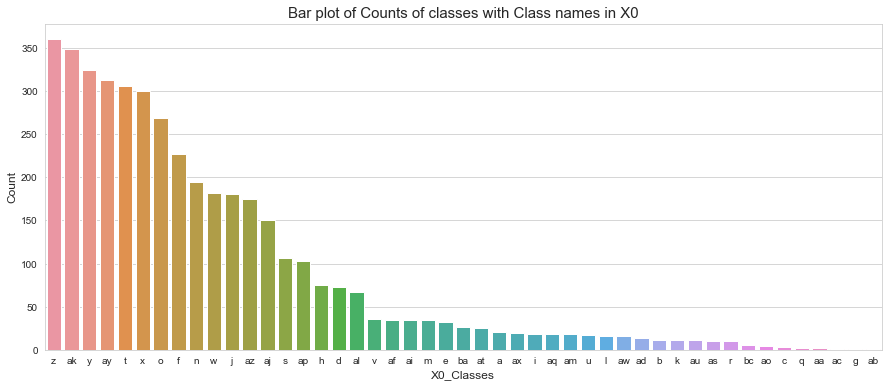

In [14]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X0'].value_counts().index,y =train['X0'].value_counts(),data = train)
plt.xlabel("X0_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X0", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class has in our dataset.
2. We can see that there are 3 classes with lowest value than others.

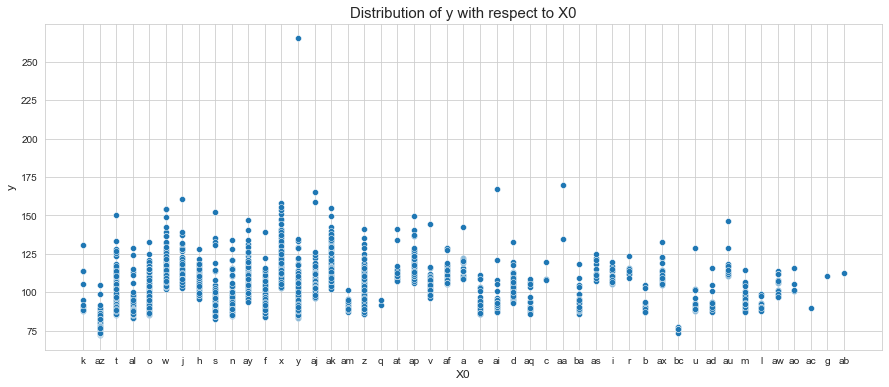

In [15]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='X0',y='y', data=train)
plt.xlabel("X0", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X0", fontsize=15)
plt.show()

#### Observations
1. The above plot is a scatter plot between Categories of X0 and distribution of y for each category.
2. We can see that there is an point in class y of X0 which is far away from other points. This can be considered as an outlier.
3. There is only one point in classes of ac,g,ab.

## X1

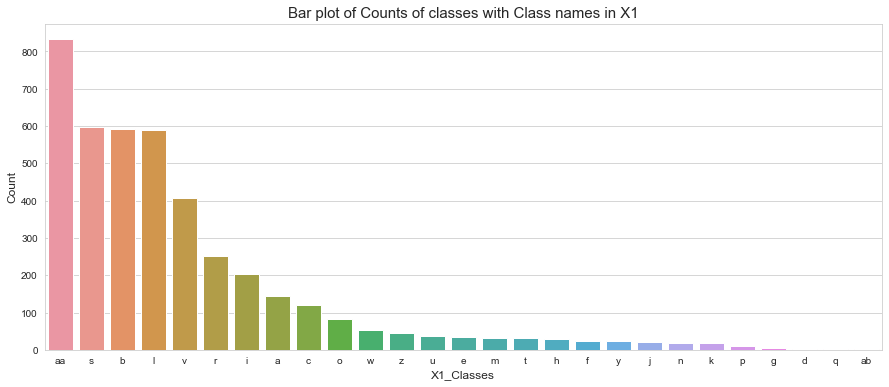

In [16]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X1'].value_counts().index,y =train['X1'].value_counts(),data = train)
plt.xlabel("X1_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X1", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X1 has in our dataset.
2. Since v class has highest count, this feature is used common for most of the cars. 
3. We can see that there are 3 classes (q,d,ab) with lowest value than others.

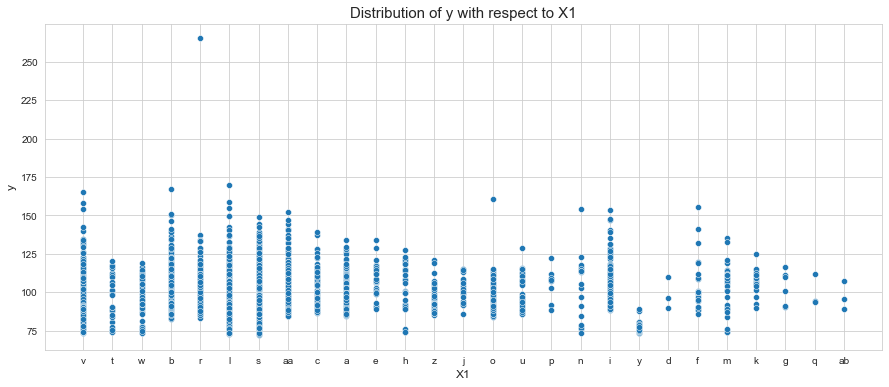

In [17]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='X1',y='y', data=train)
plt.xlabel("X1", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X1", fontsize=15)
plt.show()

#### Observations
1. The above plot is a scatter plot between Categories of X1 and distribution of y for each category.
2. We can see that there is an point in class r of X1 which is far away from other points. This can be considered as an outlier.
3. There is only one point in classes of d,q,ab.

## X2

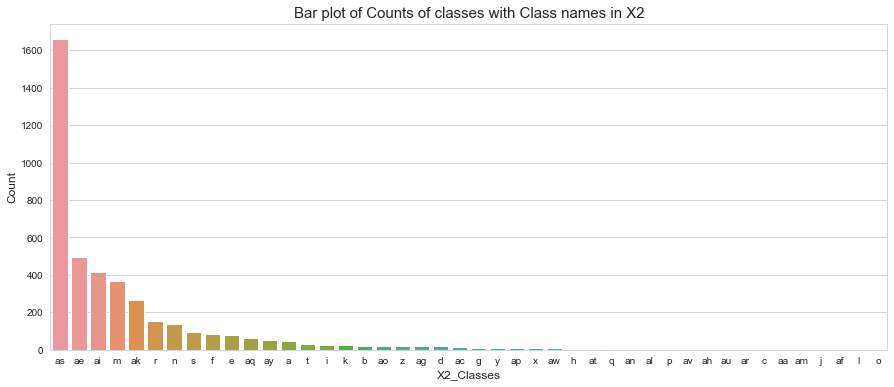

In [18]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X2'].value_counts().index,y =train['X2'].value_counts(),data = train)
plt.xlabel("X2_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X2", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X2 has in our dataset.
2. as class has highest count, that means this feature is most commonly used in cars. 
3. We can see that there are more than 5 classes with lowest value than others which implies these features might be rare in cars.

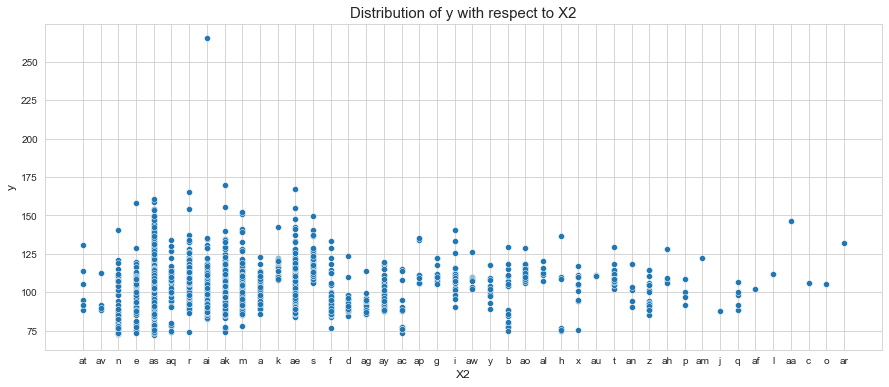

In [19]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='X2',y='y', data=train)
plt.xlabel("X2", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X2", fontsize=15)
plt.show()

#### Observations
1. The above plot is a scatter plot between Categories of X2 and distribution of y for each category.
2. We can see that there is an point in class ai of X2 which is far away from other points. This can be considered as an outlier.
3. There is only one point in classes of af,l,aa,c,o,ar which might be rare features.

## X3

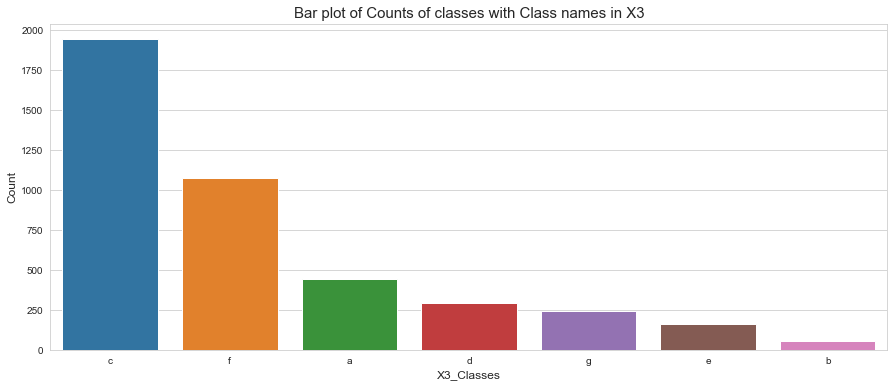

In [20]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X3'].value_counts().index,y =train['X3'].value_counts(),data = train)
plt.xlabel("X3_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X3", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X3 has in our dataset.
2. X3 has only 7 features and class a has highest count, that means this feature is most commonly used in cars. 
3. Since b has low count in dataset, we can think it as a rare feature used in cars.

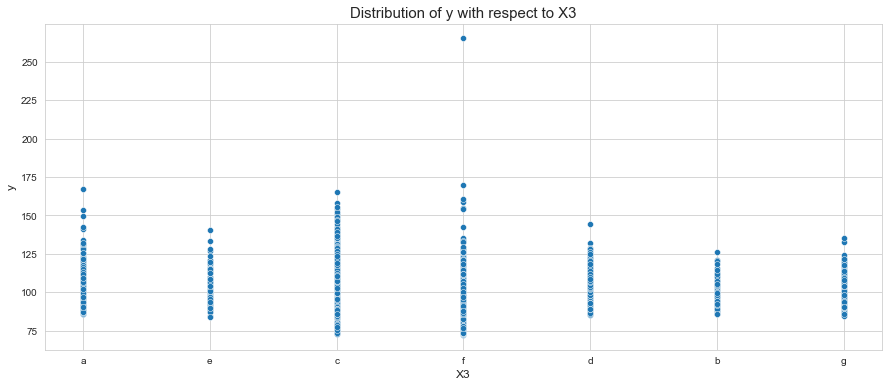

In [21]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='X3',y='y', data=train)
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X3", fontsize=15)
plt.show()

#### Observations
1. The above plot is a scatter plot between Categories of X3 and distribution of y for each category.
2. We can see that there is an point in class f of X3 which is far away from other points. This can be considered as an outlier.

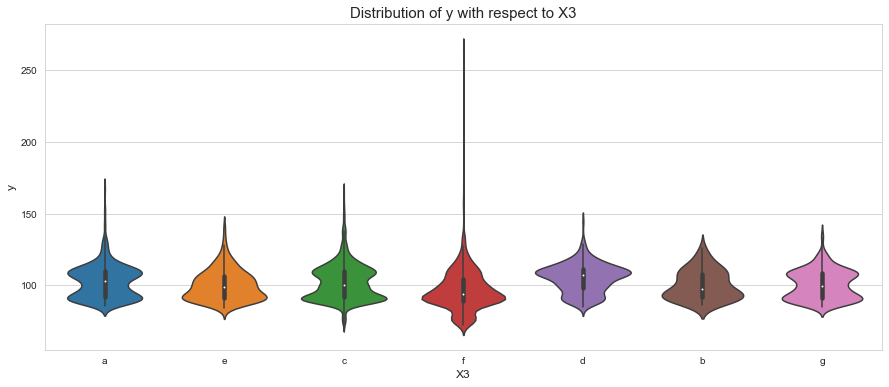

In [22]:
plt.figure(figsize = (15,6))
sns.violinplot(x='X3',y='y', data=train)
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X3", fontsize=15)
plt.show()

#### Observations
1. The above plot is a violin plot between Categories of X3 and distribution of y for each category, Data is distributed uniformly and has overlapping over classes.
2. We can see that most values are around 80 and 130.
3. There is an outlier in class f.

## X4

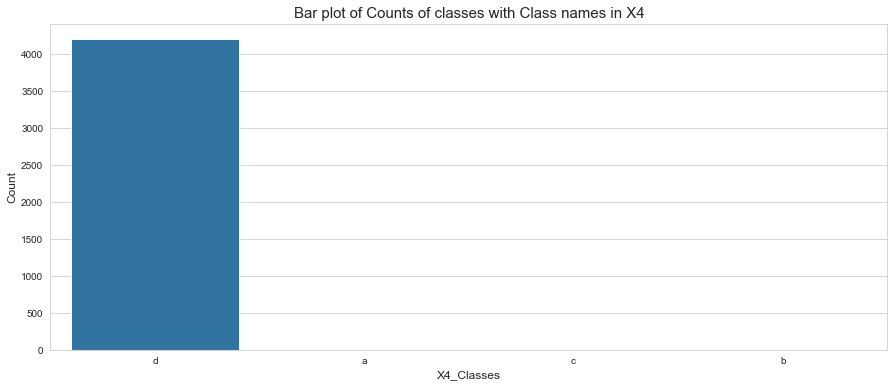

In [23]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X4'].value_counts().index,y =train['X4'].value_counts(),data = train)
plt.xlabel("X4_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X4", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X4 has in our dataset.
2. Class d has highest count, that means this feature is most commonly used in cars. 

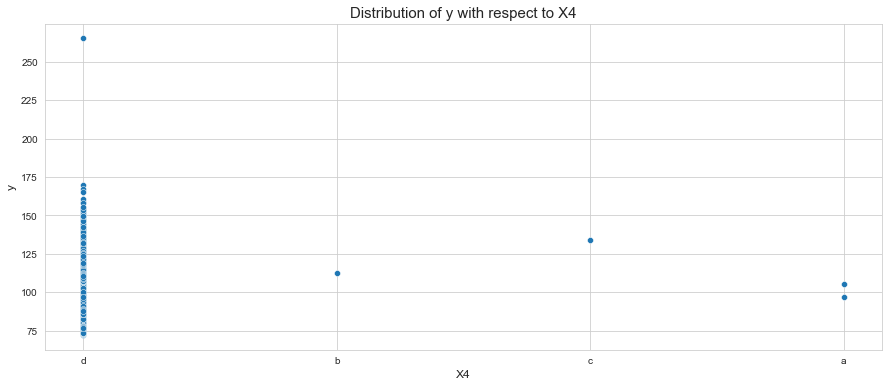

In [24]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='X4',y='y', data=train)
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X4", fontsize=15)
plt.show()

#### Observations
1. The above plot is a scatter plot between Categories of X4 and distribution of y for each category.
2. We can see that there is an point in class d of X4 which is far away from other points. This can be considered as an outlier.
3. There are only 4 values in our training data which has b,c,d classes of X4. These features are rarer.
4. This means that the variance of X4 is very low. We can remove this column from the dataset.

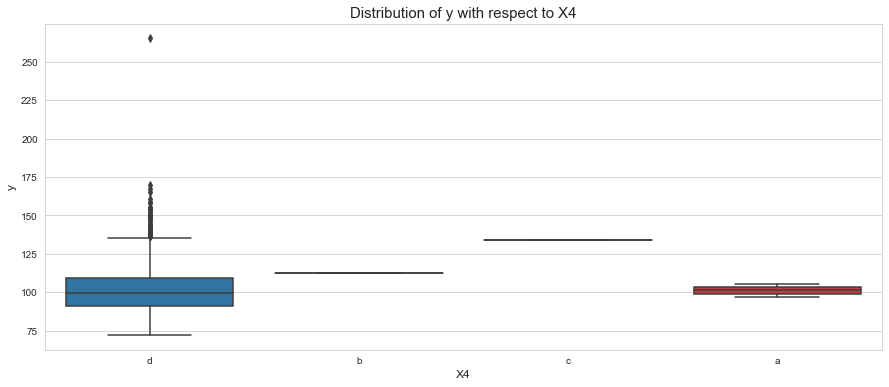

In [25]:
plt.figure(figsize = (15,6))
sns.boxplot(x='X4',y='y', data=train)
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X4", fontsize=15)
plt.show()

#### Observations
1. The above plot is box plot Categories of X4 and y for each category.
2. We can see that class d has most values between 75 and 140.
3. Test time for class b is around 115,class c is 130 and class a is between 90 and 110.

## X5

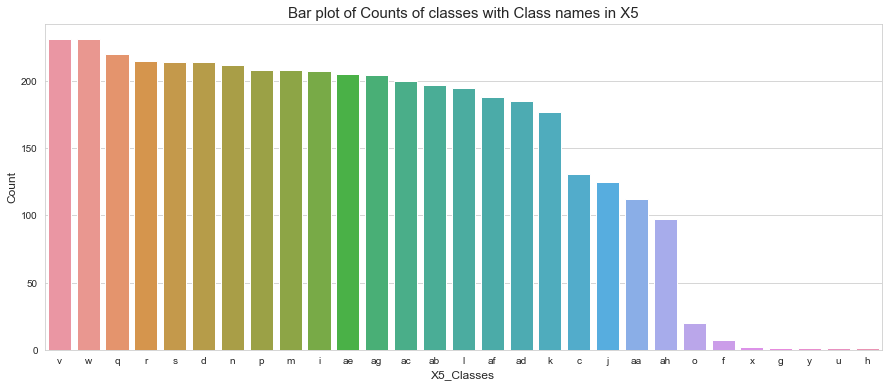

In [26]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X5'].value_counts().index,y =train['X5'].value_counts(),data = train)
plt.xlabel("X5_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X5", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X5 has in our dataset.
2. No of values for top classes are almost equal. This means that amount of data in our train for most classes is equal.
3. There are 4 classes which has lowest amount of points.

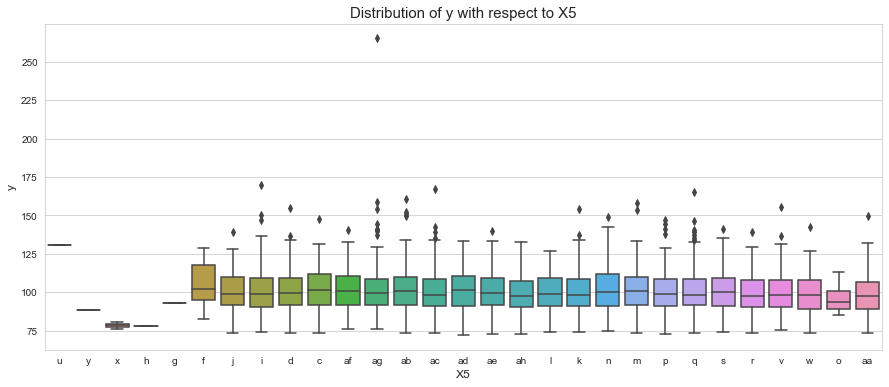

In [27]:
plt.figure(figsize = (15,6))
sns.boxplot(x='X5',y='y', data=train)
plt.xlabel("X5", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X5", fontsize=15)
plt.show()

#### Observations
1. The above plot is box plot Categories of X5 and y for each category.
2. We can see that for most classes values have range of 75 and 110.
3. From the above plot there is a point in class ag which can be considered as an outlier.
4. Class u has test time around 130, class y and g has test time around 90.
5. Class x and h might have test times between 75 and 90.

## X6

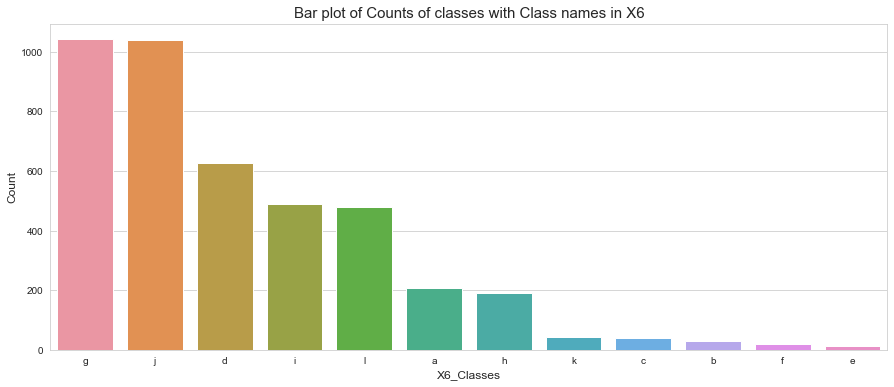

In [28]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X6'].value_counts().index,y =train['X6'].value_counts(),data = train)
plt.xlabel("X6_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X6", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X6 has in our dataset.
2. X3 has only 12 features and class g and class j has same no of points. 
3. Class k,c,b,f,e has lowest amount of points compared to other classes.

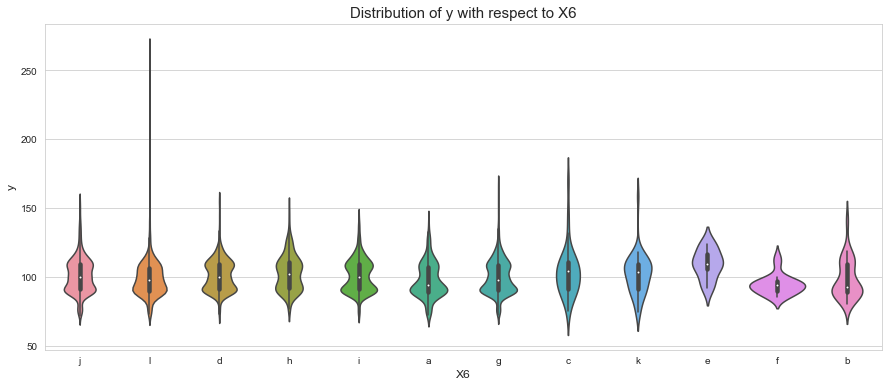

In [29]:
plt.figure(figsize = (15,6))
sns.violinplot(x='X6',y='y', data=train)
plt.xlabel("X6", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X6", fontsize=15)
plt.show()

#### Observations
1. The above plot is a violin plot between Categories of X6 and distribution of y for each category, Data is distributed uniformly and has overlapping over classes.
2. We can see that most values are around 80 and 130.
3. There is an outlier in class l.

## X8

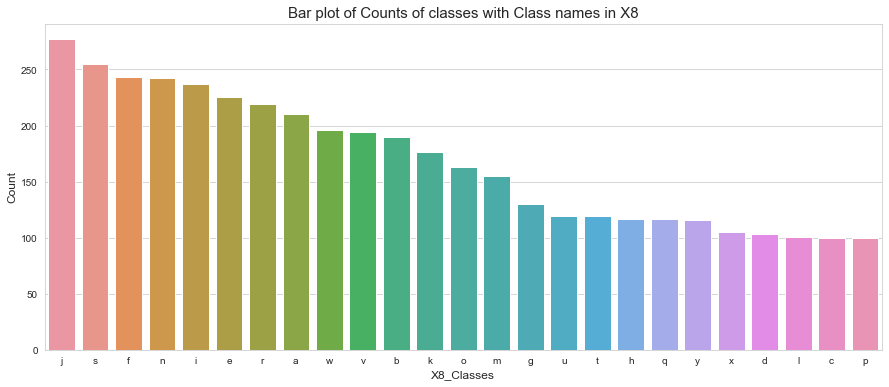

In [30]:
# Bar plot
plt.figure(figsize = (15,6))
sns.barplot(x = train['X8'].value_counts().index,y =train['X8'].value_counts(),data = train)
plt.xlabel("X8_Classes", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Bar plot of Counts of classes with Class names in X8", fontsize=15)
plt.show()

#### Observations
1. The above plot is a bar plot which represents how many values each class of X8 has in our dataset.
2. Observing bar plots of other categorical variables, bar plot of X8 has enough data for each class.
3. We can see that amount of data for classes are almost equal.

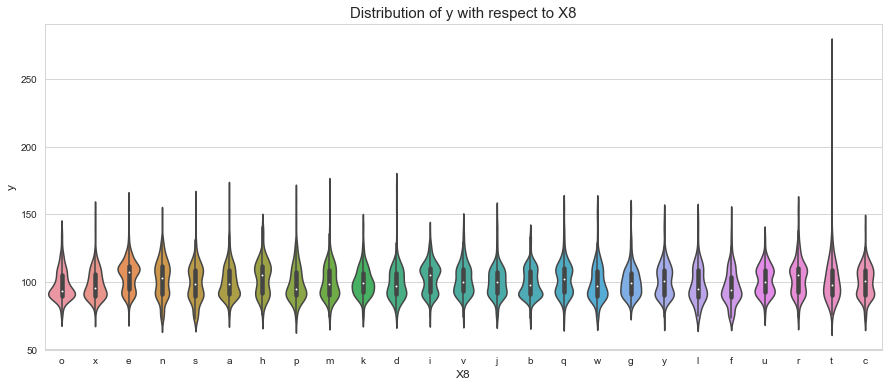

In [31]:
plt.figure(figsize = (15,6))
sns.violinplot(x='X8',y='y', data=train)
plt.xlabel("X8", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y with respect to X8", fontsize=15)
plt.show()

#### Observations
1. The above plot is a violin plot between Categories of X8 and distribution of y for each category,Data is distributed uniformly and has overlapping over classes.
2. We can see that for most classes values have range of 75 and 110.
3. From the above plot there is a point in class t which can be considered as an outlier.

### Analysis of Numerical Variables

In [32]:
constant_col = []
binary_col = []
for i in numeric:
    if i != 'ID':
        if len(train[i].value_counts().index) == 1:
            constant_col.append(i)
        else:
            binary_col.append(i)

In [33]:
print('No of columns which have only one value is ',len(constant_col))
print('Columns which have only one value are', constant_col)

No of columns which have only one value is  12
Columns which have only one value are ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [34]:
print('No of columns which have one and zero values is ',len(binary_col))
print('Columns which have only binary values are', binary_col)

No of columns which have one and zero values is  356
Columns which have only binary values are ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139'

#### Observations
1. We have 12 columns as Constant value columns, which means that in these columns there is either 1 or 0 as values in our dataset.
2. Since the variance is zero for these columns we can drop these columns from our dataset.

In [35]:
values_count = []
for i in binary_col:
    values_count.append([i,(train[i] ==0).sum(),(train[i]==1).sum()])

In [36]:
columns_values = pd.DataFrame(values_count,columns = ['feature','zero_count','one_count'])

In [37]:
pd.set_option('display.max_rows', columns_values.shape[0]+1)
print(columns_values)

    feature  zero_count  one_count
0       X10        4153         56
1       X12        3893        316
2       X13        3965        244
3       X14        2407       1802
4       X15        4207          2
5       X16        4198         11
6       X17        4177         32
7       X18        4176         33
8       X19        3790        419
9       X20        3608        601
10      X21        4198         11
11      X22        3843        366
12      X23        4122         87
13      X24        4201          8
14      X26        4188         21
15      X27        1336       2873
16      X28        4072        137
17      X29        4028        181
18      X30        4190         19
19      X31        3231        978
20      X32        4162         47
21      X33        4208          1
22      X34        4186         23
23      X35        3231        978
24      X36        4190         19
25      X37        3231        978
26      X38        4069        140
27      X39        4

#### Observations:
1. The above is a dataframe which shows count of zeros and count of ones for each feature in our datset.
2. We can see that some features like X10 has more number of zeroes and less number of ones ie it has low variance.
3. By setting a threshold on variance and removing features with low variance from our train dataset.

### Multivariate Analysis

#### Using Recursive elimination to select top features in numerical features

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

temp_train = train.copy()
Y = temp_train["y"]
temp_train.drop(['ID','y'],axis = 1,inplace= True)
temp_train.drop(categ,axis = 1,inplace = True)
X = temp_train
names = list(temp_train.columns)
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [39]:
print("Top 15 features are")
rank_features = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
features = []
for i in range(15):
    print(rank_features[i])
    features.append(rank_features[i][1])

Top 15 features are
(1, 'X17')
(2, 'X382')
(3, 'X207')
(4, 'X138')
(5, 'X208')
(6, 'X48')
(7, 'X134')
(8, 'X112')
(9, 'X199')
(10, 'X157')
(11, 'X156')
(12, 'X222')
(13, 'X379')
(14, 'X376')
(15, 'X346')


In [40]:
corr_df = train[features]

<AxesSubplot:>

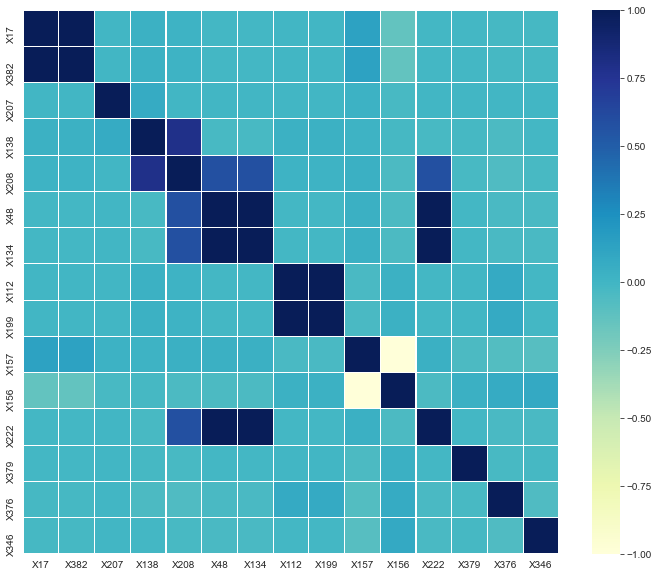

In [41]:
corrmat = corr_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

#### Observations:
1. The above plot is a correlation plot of the top 15 numerical features found using Recursive feature elimination (linear regression as model).
2. From above plot we can see that X29 and X76 are highly correlated and X17 ,X382 are highly correlated as well.
3. So we need to remove features which are multicollinear.

## Conclusion of EDA
1. Removing feature ID and X4 from the dataset since X4 has lowest variance.
2. Removing constant values columns from the dataset.
3. Removing points which have target test time greater than 150 from the dataset.
4. Remove multicollinear features.

## Data Preprocessing

In [42]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


#### Dropping ID column

In [43]:
columns_drop_list = ['ID']

In [44]:
train.drop(['ID'],axis = 1,inplace = True)

In [45]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


#### Dropping X4 column

In [46]:
columns_drop_list.append('X4')

In [47]:
train.drop(['X4'],axis = 1,inplace = True)

In [48]:
train.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train.shape

(4209, 376)

#### Removing constant value columns

In [50]:
constant_col

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [51]:
columns_drop_list = columns_drop_list+constant_col

In [52]:
train.drop(constant_col,axis =1,inplace = True)

In [53]:
train.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Removing multicollinear columns

In [54]:
# Removing duplicated columns.
dups=list(train.T.index[train.T.duplicated(keep= 'first')].values)
print('No of duplicate columns are ',len(dups))

No of duplicate columns are  45


In [55]:
columns_drop_list = columns_drop_list+dups

In [56]:
# Removing duplicate columns from our train data
train.drop(dups,axis =1,inplace = True)

In [57]:
train.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,130.81,k,v,at,a,u,j,o,0,0,...,0,0,0,0,1,0,0,0,0,0
1,88.53,k,t,av,e,y,l,o,0,0,...,0,0,1,0,0,0,0,0,0,0
2,76.26,az,w,n,c,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.62,az,t,n,f,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
train.shape

(4209, 319)

#### Selcting rows which have target less than 150

In [59]:
train_preprocessed = train[train['y'] <= 150]

In [60]:
train_preprocessed.shape

(4194, 319)

In [61]:
train_preprocessed.to_csv('preprocessed_train_eda.csv',index = False)

#### Importing test data

In [62]:
# Removing the columns dropped from train in test
test = pd.read_csv('test.csv')

In [63]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
test.drop(columns_drop_list,axis = 1,inplace = True)

In [65]:
test.head()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,az,v,n,f,t,a,w,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,b,ai,a,b,g,y,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,v,as,f,a,j,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,az,l,n,f,z,l,n,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,w,s,as,c,y,i,m,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
test.to_csv('preprocessed_test_eda.csv',index = False)

In [67]:
file = 'Removable_col'
file_dump = open(file,'wb')
pickle.dump(columns_drop_list,file_dump)
file_dump.close()

### Using Random Forest to get top features from orginal numerical features to create interaction features

In [68]:
train = pd.read_csv('train.csv')
numerical_col = list(train.select_dtypes(include = 'int64').columns)
train_numeric = train[numeric]

In [69]:
random_forest_model = RandomForestRegressor(random_state = 42,n_jobs = -1)
params = {'n_estimators':[100,150,200,250,300,350,500],
         'max_depth':[2,3,5,7,10],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_features':[0.95],
         'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10]}

In [70]:
clf_model = RandomizedSearchCV(random_forest_model,params,cv = 10,scoring = 'r2',n_jobs = -1,verbose = True)
clf_model.fit(train_numeric,train['y'].values)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 10],
                                        'max_features': [0.95],
                                        'min_impurity_decrease': [1e-05, 0.0001,
                                                                  0.001, 0.01,
                                                                  0.1, 0, 1,
                                                                  10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                         

In [71]:
best_model = clf_model.best_estimator_
best_model.fit(train_numeric,train['y'].values)

RandomForestRegressor(max_depth=7, max_features=0.95, min_impurity_decrease=0.1,
                      min_samples_leaf=4, min_samples_split=9, n_jobs=-1,
                      random_state=42)

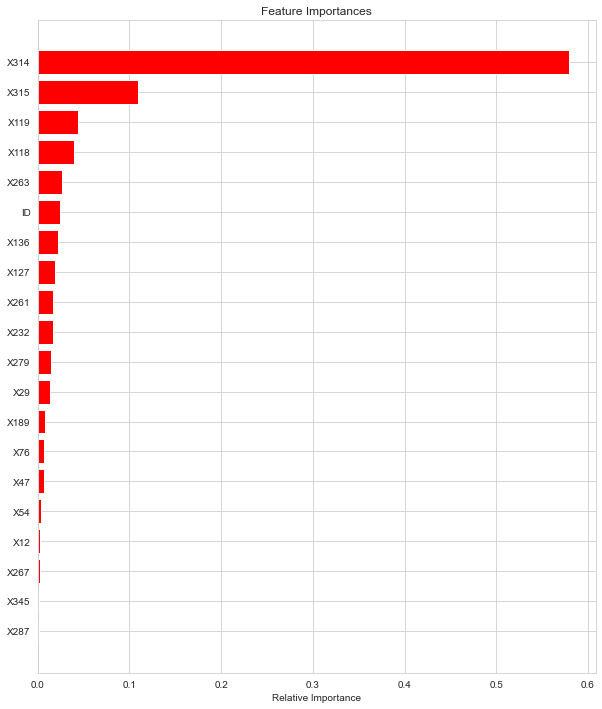

In [72]:
features = train_numeric.columns
feature_importance = best_model.feature_importances_
indices = np.argsort(feature_importance)[-20:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### From above feature importance plot we can make a list of top features to make interaction features

In [73]:
top_features = ['X315','X314','X119','X118','X263','X136','X127','X261','X232','X279','X29','X189','X76','X47','X54']

In [74]:
file = 'Top-features'
file_dump = open(file,'wb')
pickle.dump(top_features,file_dump)
file_dump.close()